# Задача 1
Постройте график <br>
Назовите график <br>
Сделайте именование оси x и оси y <br>
Сделайте выводы <br>

1.1. Скачать следующие данные: kc-house-data и laptop_price <br>
1.2. Изучите стоимости недвижимости <br>
1.3. Изучите распределение квадратуры жилой <br>
1.4. Изучите распределение года постройки

In [100]:
import pandas as pd
import matplotlib.pyplot as plt 

### 1.1. Скачать следующие данные: kc-house-data

In [101]:
houses = pd.read_csv('kc_house_data.csv')
#Выведем 5 первых строк, проверим, что файл читается, посмотрим на данные, содержащиеся в файле
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [102]:
#Выведем типы данных столбцов
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Расшифровка:
- id - Уникальный ID для каждого дома
- date - Дата продажи дома
- price - Стоимость продажи дома
- bedrooms - Кол-во спален
- bathrooms - Кол-во ванных комнат (0.5 - туалет без душа)
- sqft_living - Кв. метры жилые
- sqft_lot - Кв. метры общие
- floors - Кол-во этажей
- waterfront - Есть набережная или нет
- view - Значение от 0 до 4 насколько хороший вид
- condition - Значение от 1 до 5 насколько хорошее состояние
- grade - Значение от 1 до 13, где 1-6 плохая конструкция здания и дизайн, 7-10 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна
- sqft_above - Кв. метры дома, которые находятся выше земли
- sqft_basement - Кв. метры дома, которые находятся ниже земли
- yr_built - Год постройки дома
- yr_renovated - Год ремонта дома
- zipcode - Индекс
- lat - Широта
- long - Долгота
- sqft_living15 - Кв. метры жилой площади у 15 соседей
- sqft_lot15 - Кв. метры общей площади у 15 соседей


### 1.2. Изучите стоимости недвижимости

In [103]:
#Вывыдем мин, среднее и макс значения стоимости
houses['price'].min(), round(houses['price'].mean(),2), houses['price'].max()

(75000.0, 540088.14, 7700000.0)

In [104]:
#Выведем информацию по соотношению диапазона сумм и количеству домов в указанном диапазоне. За диапазон возьмем разницу между макс и мин суммой, деленной на 10^6 (1000000)
#round - округляем получившийся результат. В результате получаем 8 значений.
#Отсортируем по индексу
houses['price'].value_counts(bins=round((houses['price'].max() - houses['price'].min()) / 1000000)).sort_index(ascending=True)


(67374.999, 1028125.0]    20204
(1028125.0, 1981250.0]     1198
(1981250.0, 2934375.0]      154
(2934375.0, 3887500.0]       45
(3887500.0, 4840625.0]        5
(4840625.0, 5793750.0]        4
(5793750.0, 6746875.0]        0
(6746875.0, 7700000.0]        3
Name: count, dtype: int64

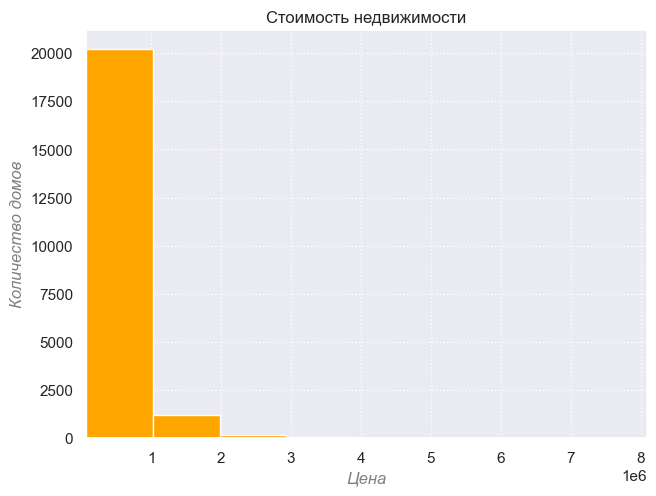

In [105]:
#Зададим bins = разнице макс и мин стоимости, указанных в файле, / 10^6, чтобы увидеть результат по диапазону сумм = 10^6
plt.hist(houses['price'], bins=round((houses['price'].max() - houses['price'].min()) / 1000000), color='orange')
#Зададим жесткие границы отображения значений по оси x слева
plt.xlim(left=houses['price'].min())
#Зададим наименования осей и графика
plt.xlabel('Цена', color='gray', style='italic')
plt.ylabel('Количество домов', color='gray', style='italic')
plt.title('Стоимость недвижимости')
#Зададим сетку пунктиром
plt.grid(linestyle=':')
#Немного увеличим отступы в графике
plt.tight_layout(pad=0.1)

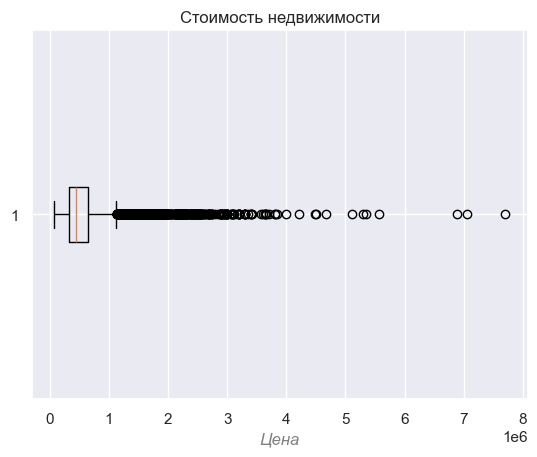

In [106]:
#Т.к. на графике выше не видно ничего, начиная со стоимости 4 * 10^6, поэтому сделаем еще один график.
plt.boxplot(houses['price'], vert=False)
#Зададим наименования осей и графика
plt.xlabel('Цена', color='gray', style='italic')
plt.title('Стоимость недвижимости');

##### Вывод:
Больше всего домов со стоимостью в диапазоне от 0 до 1 000 000 (1 * 10^6). Меньше всего домов со стоимостью в диапазоне от 6 000 000 (6 * 10^6) до 7 000 000 (7 * 10^6). Средняя стоимость домов примерно 500 000 (0,5 * 10^6).

### 1.3. Изучите распределение квадратуры жилой

In [107]:
#Вывыдем мин, среднее и макс значения квадратуры
houses['sqft_living'].min(), round(houses['sqft_living'].mean(),2), houses['sqft_living'].max()

(290, 2079.9, 13540)

In [108]:
#Выведем информацию по соотношению диапазона квадратуры и количеству домов в указанном диапазоне. За диапазон возьмем разницу между макс и мин квадратурой, деленной на 1000
#round - округляем получившийся результат. В результате получаем 14 значений.
#Отсортируем по индексу
houses['sqft_living'].value_counts(bins=round(houses['sqft_living'].max() / 1000)).sort_index(ascending=True)

(276.749, 1236.429]        3385
(1236.429, 2182.857]      10034
(2182.857, 3129.286]       5566
(3129.286, 4075.714]       1924
(4075.714, 5022.143]        499
(5022.143, 5968.571]        135
(5968.571, 6915.0]           39
(6915.0, 7861.429]           20
(7861.429, 8807.857]          5
(8807.857, 9754.286]          2
(9754.286, 10700.714]         2
(10700.714, 11647.143]        0
(11647.143, 12593.571]        1
(12593.571, 13540.0]          1
Name: count, dtype: int64

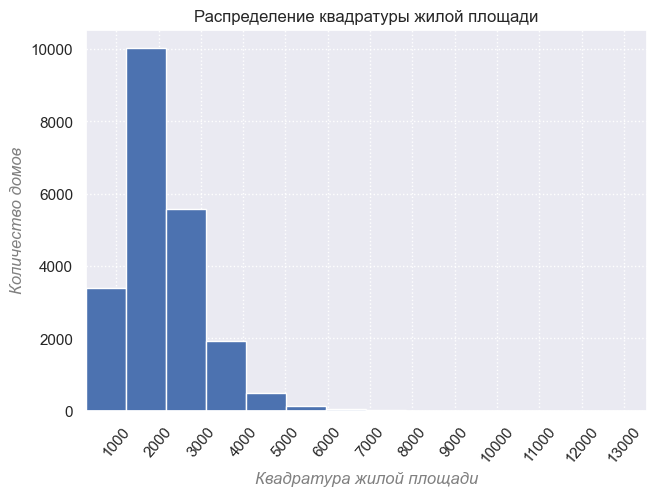

In [109]:
#Зададим bins = разнице макс и мин значения квадратуры, указанных в файле, / 1000, чтобы увидеть результат по диапазонам квадратуры
plt.hist(houses['sqft_living'], bins=round(houses['sqft_living'].max() / 1000), label='sds')#, orientation="horizontal")
#Зададим жесткие границы отображения значений по оси x
plt.xlim(left=houses['sqft_living'].min(), right=houses['sqft_living'].max())
#Увеличим количество тактов по оси х для наглядности
plt.locator_params(axis='x', nbins=round(houses['sqft_living'].max() / 1000))
#Т.к. по оси x получилось 14 значений, выведем их названия под углом, чтобы было читабельнее
plt.xticks(rotation=50)
#Зададим наименования осей и графика
plt.xlabel('Квадратура жилой площади', color='gray', style='italic')
plt.ylabel('Количество домов', color='gray', style='italic')
plt.title('Распределение квадратуры жилой площади')
#Зададим сетку пунктиром
plt.grid(linestyle=':')
#Немного увеличим отступы в графике
plt.tight_layout(pad=0.1)


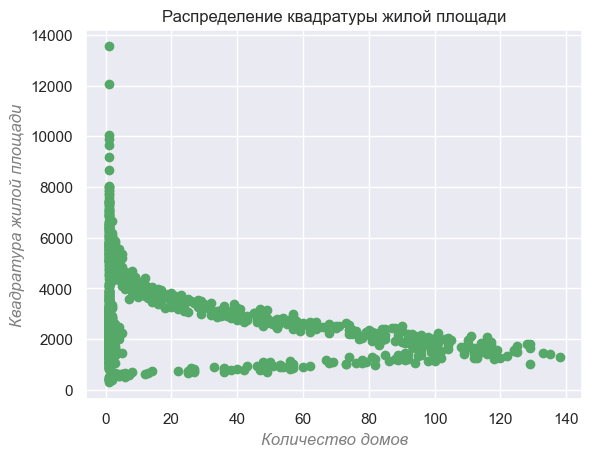

In [110]:
#Т.к. на графике выше не видно ничего, начиная со квадратуры 8000, построим дополнительно еще один график.
plt.plot(houses['sqft_living'].value_counts().values, houses['sqft_living'].value_counts().index, 'go')
#Зададим наименования осей и графика
plt.xlabel('Количество домов', color='gray', style='italic')
plt.ylabel('Квадратура жилой площади', color='gray', style='italic')
plt.title('Распределение квадратуры жилой площади');

##### Вывод:
Больше всего домов с квадратурой жилой площади около 2000. Меньше всего домов с квадратурой жилой площади от 10 000 до 14 000

### 1.4. Изучите распределение года постройки

In [111]:
#Выведем количество домов в разрезе годов постройки
houses['yr_built'].value_counts()


yr_built
2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64

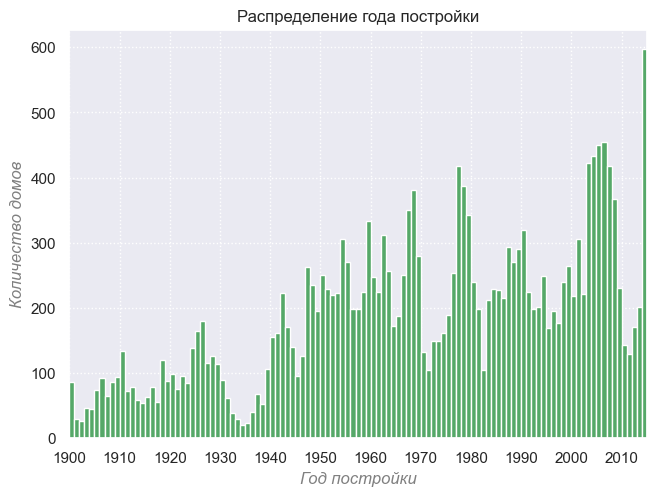

In [112]:
#Зададим bins = количеству годов, указанных в файле (макс-мин), чтобы увидеть результат по годам
plt.hist(houses['yr_built'], bins=houses['yr_built'].max() - houses['yr_built'].min(), color='g')
#Зададим жесткие границы отображения значений по оси x
plt.xlim(left=houses['yr_built'].min(), right=houses['yr_built'].max())
#Увеличим количество тактов по оси х для наглядности
plt.locator_params(axis='x', nbins=12)
#Зададим наименования осей и графика
plt.xlabel('Год постройки', color='gray', style='italic')
plt.ylabel('Количество домов', color='gray', style='italic')
plt.title('Распределение года постройки')
#Зададим сетку пунктиром
plt.grid(linestyle=':')
#Немного увеличим отступы в графике
plt.tight_layout(pad=0.1)

##### Вывод:
Больше всего домов было построено в 2014 году, меньше всего домов было построено в 1934 году. 

# Задача 2
2.1. Изучите распределение домов от наличия вида на набережную <br>
Постройте график  <br>
Сделайте выводы <br>
2.2. Изучите распределение этажей домов <br>
2.3. Изучите распределение состояния домов

### 2.1 Изучите распределение домов от наличия вида на набережную <br> Постройте график  <br> Сделайте выводы <br> 

In [113]:
#Выведем количество домов в разрезе видов на набережную. Присвоим ее в переменную
waterfronts = houses['waterfront'].value_counts()
waterfronts

waterfront
0    21450
1      163
Name: count, dtype: int64

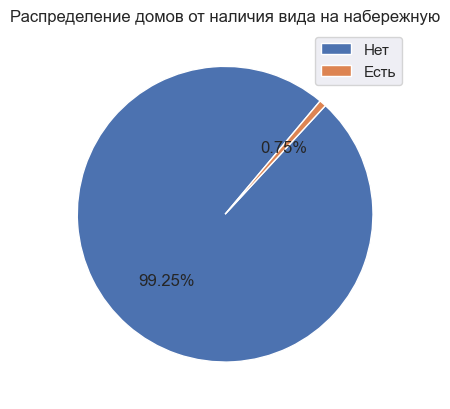

In [114]:
#Выведем график
plt.pie(waterfronts, autopct='%1.2f%%', startangle=50)
#Выведем наименование графика
plt.title('Распределение домов от наличия вида на набережную')
#Выведем легенду, где 0 - нет, 1 - есть
plt.legend(['Нет', 'Есть']);
 

##### Вывод:
Домов с видом на набережную менее 1% от общего количества домов.

### 2.2. Изучите распределение этажей домов

In [115]:
#Выведем количество домов в разрезе этажей. Отсортируем по значению
houses['floors'].value_counts().sort_index()

floors
1.0    10680
1.5     1910
2.0     8241
2.5      161
3.0      613
3.5        8
Name: count, dtype: int64

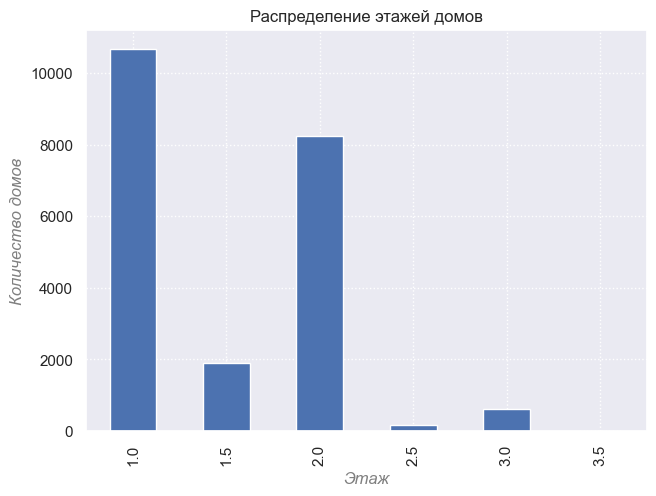

In [116]:
#Выведем на графике количество домов в разрезе этажей с сортировкой по значению
houses['floors'].value_counts().sort_index().plot(kind='bar')
#Зададим наименования осей и графика
plt.xlabel('Этаж', color='gray', style='italic')
plt.ylabel('Количество домов', color='gray', style='italic')
plt.title('Распределение этажей домов')
#Зададим сетку пунктиром
plt.grid(linestyle=':')
#Немного увеличим отступы в графике
plt.tight_layout(pad=0.1)

##### Вывод:
Больше всего одноэтажных домов. Меньше всего домов с высотой в 3,5 этажа.

### 2.3. Изучите распределение состояния домов

In [117]:
#Подключим библиотеку seaborn для разнообразия графиков
import seaborn as sns

In [118]:
#Выведем количество домов в разрезе состояний. Отсортируем по значению
conditions = houses['condition'].value_counts().sort_index()
conditions

condition
1       30
2      172
3    14031
4     5679
5     1701
Name: count, dtype: int64

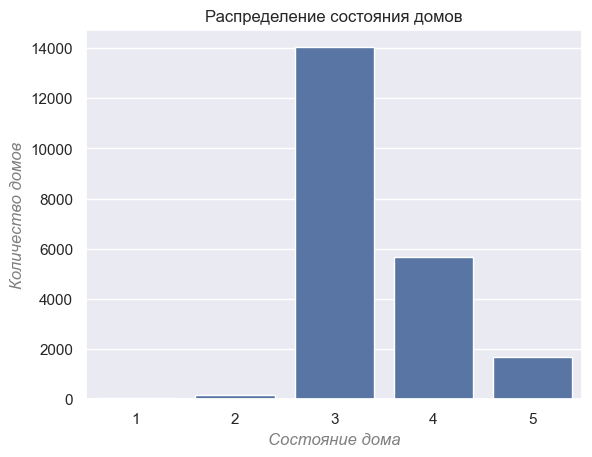

In [127]:
#Выведем на графике количество домов в разрезе состояний с сортировкой по значению
sns.countplot(data=houses, x='condition')
#Зададим наименования осей и графика
plt.xlabel('Состояние дома', color='gray', style='italic')
plt.ylabel('Количество домов', color='gray', style='italic')
plt.title('Распределение состояния домов');

##### Вывод:
Больше всего домов с удовлетворительным состоянием (= 3), меньше всего домов с самым плохим состоянием дома.

##### Ради интереса посмотрим распределение этажей в домах в разрезе состояний домов

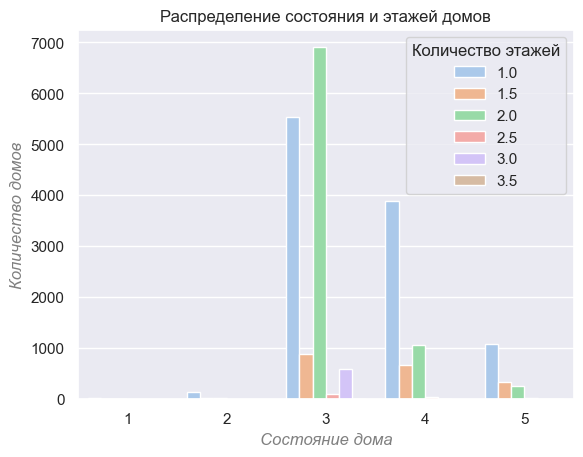

In [120]:
#Выведем на графике количество домов в разрезе состояний и количества этажей, с сортировкой по значению и количеству этажей
sns.countplot(data=houses, x='condition', hue='floors', palette = 'pastel')
#Зададим наименования осей и графика
plt.xlabel('Состояние дома', color='gray', style='italic')
plt.ylabel('Количество домов', color='gray', style='italic')
plt.title('Распределение состояния и этажей домов')
#Зададим наименование легенде
plt.legend(title='Количество этажей');

##### Вывод:
Среди домов с удовлетворительным состоянием (=3) больше всего 2х этажных домов, меньше всего домов с высотой в 2,5 этажа.

# Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.<br>
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [121]:
#grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна.
#Т.к. не все значения присутствуют в списке, скорректируем ТЗ:
#grade - Значение от 1 до 13, где 1-6 плохая конструкция здания и дизайн, 7-10 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна
#Сделаем новый столбец grade_desr, в котором будет только 3 значения: плохо, удовлетворительно, отлично, в зависимости от данных в столбце grade
houses.loc[(houses['grade'] >= 1) & (houses['grade'] <= 6), 'grade_desr'] = 'bad'
houses.loc[(houses['grade'] >= 7) & (houses['grade'] <= 10), 'grade_desr'] = 'satisfactory'
houses.loc[(houses['grade'] >= 11) & (houses['grade'] <= 13), 'grade_desr'] = 'excellent'
#Выведем сколько данных получилось по каждому значению
houses['grade_desr'].value_counts().sort_index()

grade_desr
bad              2313
excellent         502
satisfactory    18798
Name: count, dtype: int64

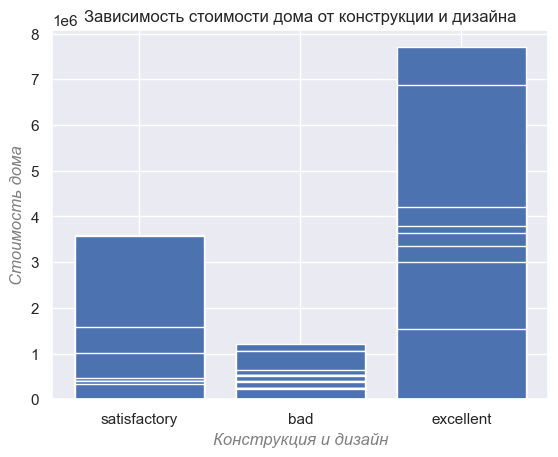

In [122]:
#Выведем на графике зависимость стоимости дома от конструкции и дизайна
plt.bar(houses['grade_desr'], houses['price'])
#Зададим наименования осей и графика
plt.xlabel('Конструкция и дизайн', color='gray', style='italic')
plt.ylabel('Стоимость дома', color='gray', style='italic')
plt.title('Зависимость стоимости дома от конструкции и дизайна');

##### Вывод:
Чем лучше конструкция и дизайн дома, тем выше его стоимость.

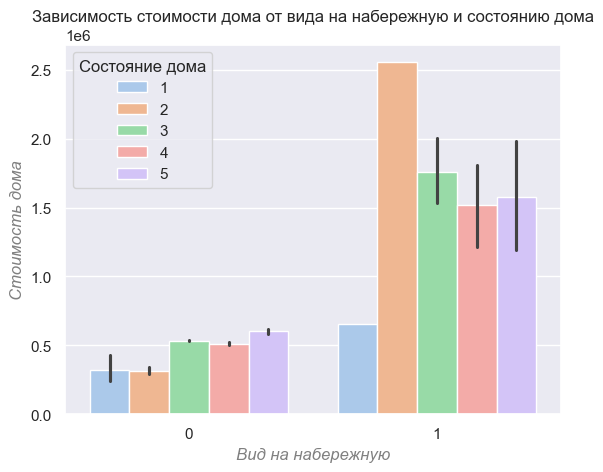

In [123]:
#Выведем на графике зависимость стоимости дома от вида на набережную и состоянию дома
sns.barplot(data=houses, x='waterfront', y='price', hue='condition', palette = 'pastel')
#Зададим наименования осей и графика
plt.xlabel('Вид на набережную', color='gray', style='italic')
plt.ylabel('Стоимость дома', color='gray', style='italic')
plt.title('Зависимость стоимости дома от вида на набережную и состоянию дома')
#Зададим наименование легенде
plt.legend(title='Состояние дома');

##### Вывод:
Дома с видом на небережную имеют более высокую стоимость. Из них дома, с состоянием, чуть хуже удовлетворительного (=2), имеют самую высокую стоимость.

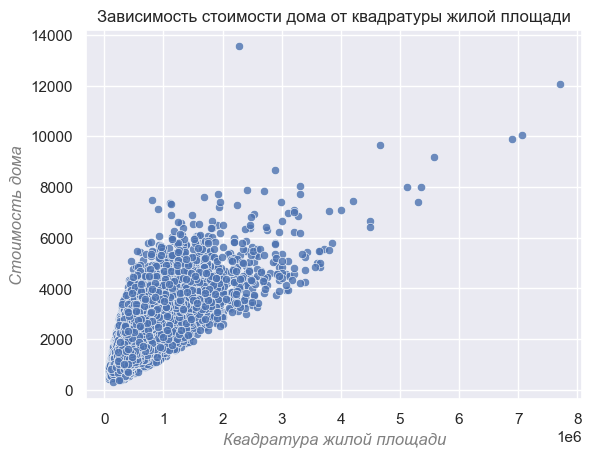

In [124]:
#Выведем на графике зависимость стоимости дома от квадратуры жилой площади
sns.scatterplot(data=houses, x='price', y='sqft_living', alpha=0.8)
#Зададим наименования осей и графика
plt.xlabel('Квадратура жилой площади', color='gray', style='italic')
plt.ylabel('Стоимость дома', color='gray', style='italic')
plt.title('Зависимость стоимости дома от квадратуры жилой площади');

##### Вывод:
В целом, можно сделать вывод, что чем больше площадь дома, тем выше его стоимость.

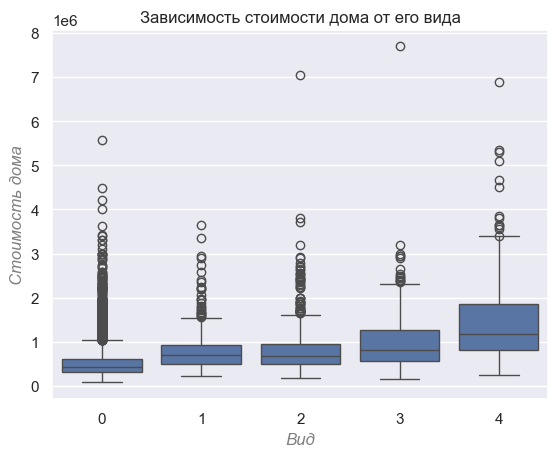

In [125]:
#Выведем на графике зависимость стоимости дома от его вида
sns.boxplot(data=houses, x='view', y='price')
#Зададим наименования осей и графика
plt.xlabel('Вид', color='gray', style='italic')
plt.ylabel('Стоимость дома', color='gray', style='italic')
plt.title('Зависимость стоимости дома от его вида');

##### Вывод:
В целом, можно сказать, что чем лучше вид, тем выше стоимость дома. Но есть и небольшие исключения.

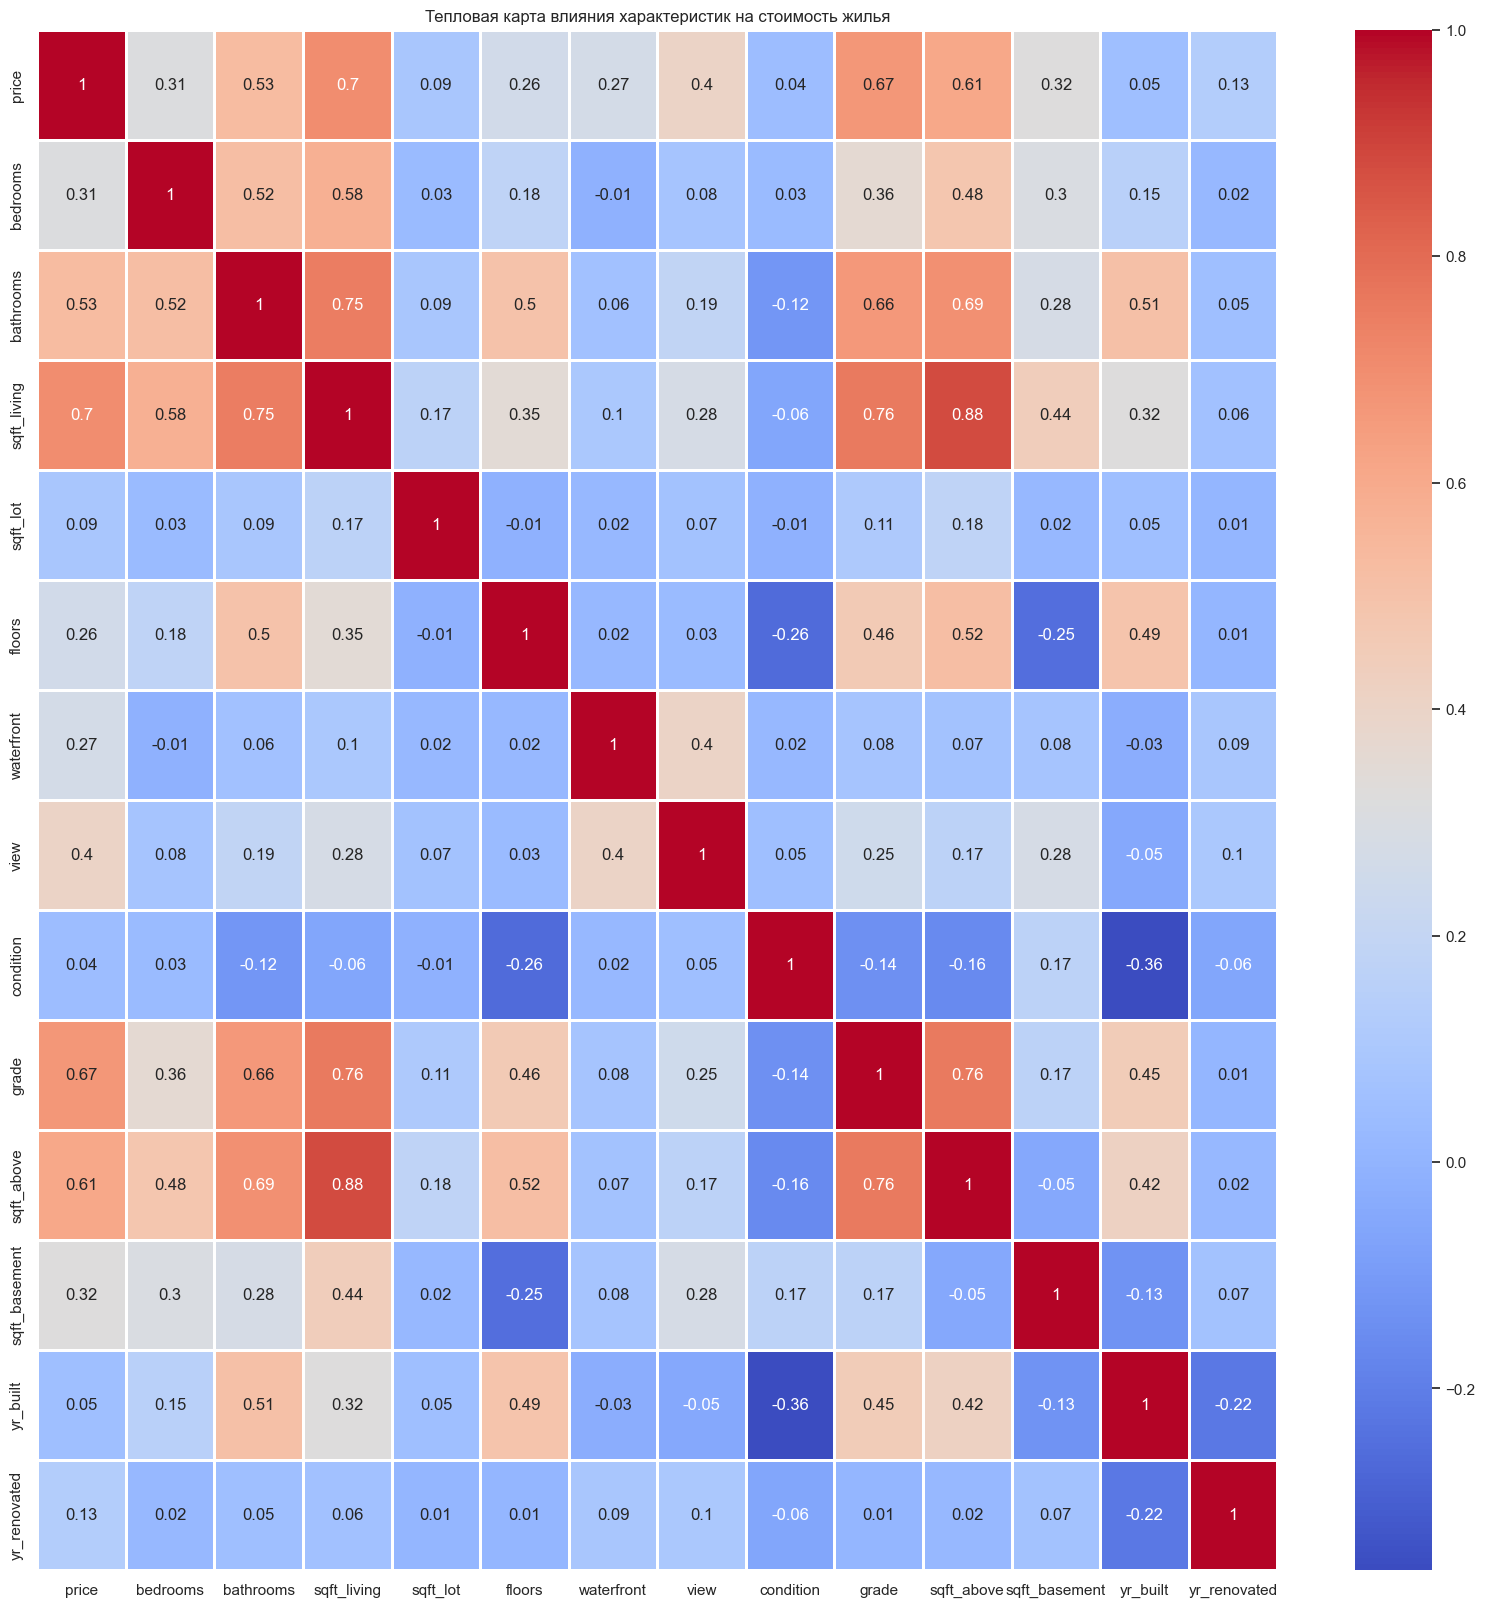

In [126]:
#Выберем данные, которые будем использовать в графике
data = houses[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]
#Создадим матрицу, значения округлим до 2х знаков до запятой
corr_matrix = round(data.corr(),2)
#зададим размер, чтобы информация в ячейках была читабельна
plt.figure(figsize=(20, 20))
#Выведем тепловую карту влияния характеристик на стоимость жилья
sns.heatmap(corr_matrix, annot=True, linewidths=2, cmap='coolwarm')
#Зададим наименования графика
plt.title('Тепловая карта влияния характеристик на стоимость жилья');

##### Вывод:
Больше всего стоимость домов зависит от жилой площади, далее от конструкции здания и дизайна и от площади дома, которые находятся выше земли.
Меньше всего стоимость домов зависит от состояния дома, года постройки и общей площади дома.